In [162]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [163]:
dataset = MNIST(root = 'data/',download=True) # download traianing dataset

In [164]:
len(dataset)

60000

In [165]:
test_dataset = MNIST(root='data/',train=False)

In [166]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F15BE3F2390>, 5)

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


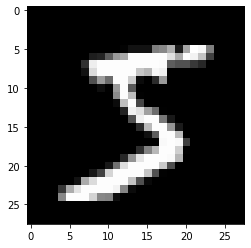

In [168]:
image, label = dataset[0]
plt.imshow(image, cmap = 'gray')
print("Label:",label)

Label: 3


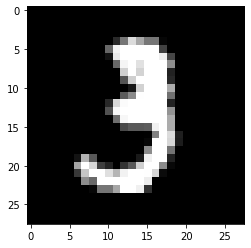

In [169]:
image, label = dataset[10]
plt.imshow(image, cmap = 'gray')
print("Label:",label)

In [170]:
import torchvision.transforms as transforms

In [171]:
dataset = MNIST(root='data/',
                train = True, 
                transform =transforms.ToTensor() )

In [172]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label) # channel, row, colun

torch.Size([1, 28, 28]) 5


In [173]:
img_tensor[0,10:15,10:15]

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])

In [174]:
torch.max(img_tensor), torch.min(img_tensor)

(tensor(1.), tensor(0.))

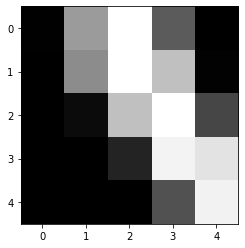

In [175]:
plt.imshow(img_tensor[0,10:15,10:15], cmap = 'gray')

## **Training and Validation Datasets:**

In [176]:
# While building real-world machine learning models, it is quite common to split the dataset into three parts:

# Training set - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.
# Validation set - used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model.
# Test set - used to compare different models or approaches and report the model's final accuracy.

In [177]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [178]:
from torch.utils.data import DataLoader

batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle= True)
val_loader = DataLoader(val_ds, batch_size)

## **Model** 

A logistic regression model is almost identical to a linear regression model. It contains weights and bias matrices, and the output is obtained using simple matrix operations (pred = x @ w.t() + b).

As we did with linear regression, we can use nn.Linear to create the model instead of manually creating and initializing the matrices.

Since nn.Linear expects each training example to be a vector, each 1x28x28 image tensor is flattened into a vector of size 784 (28*28) before being passed into the model.

The output for each image is a vector of size 10, with each element signifying the probability of a particular target label (i.e., 0 to 9). The predicted label for an image is simply the one with the highest probability.





In [179]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes) # logistic reg model

In [180]:
model.weight

Parameter containing:
tensor([[ 0.0125,  0.0045,  0.0012,  ..., -0.0004,  0.0123, -0.0109],
        [ 0.0041,  0.0069,  0.0253,  ..., -0.0311, -0.0300, -0.0018],
        [-0.0235, -0.0246,  0.0173,  ..., -0.0255, -0.0040,  0.0255],
        ...,
        [ 0.0259,  0.0321,  0.0323,  ...,  0.0226, -0.0035, -0.0332],
        [-0.0329, -0.0307,  0.0090,  ..., -0.0075,  0.0300, -0.0184],
        [ 0.0247,  0.0171, -0.0174,  ...,  0.0048,  0.0319,  0.0015]],
       requires_grad=True)

In [181]:
model.weight.shape

torch.Size([10, 784])

In [182]:
model.bias

Parameter containing:
tensor([-0.0248,  0.0336,  0.0024, -0.0207,  0.0131,  0.0082, -0.0270, -0.0092,
        -0.0048, -0.0125], requires_grad=True)

In [183]:
model.bias.shape

torch.Size([10])

In [184]:
for images, label in train_loader:
  print(label)
  print(images.shape)
  outputs = model(images)
  print(outputs)
  break


tensor([1, 5, 6, 4, 6, 3, 9, 3, 0, 3, 6, 4, 0, 5, 7, 9, 6, 7, 2, 3, 9, 4, 6, 0,
        3, 9, 1, 3, 9, 0, 5, 5, 3, 4, 4, 6, 3, 1, 5, 5, 1, 1, 1, 2, 9, 0, 4, 7,
        4, 2, 4, 3, 3, 4, 2, 9, 0, 2, 4, 3, 3, 8, 7, 5, 5, 2, 7, 1, 2, 2, 9, 4,
        0, 8, 4, 8, 9, 1, 1, 2, 8, 9, 2, 4, 6, 0, 8, 8, 6, 1, 9, 8, 9, 7, 0, 3,
        6, 9, 0, 0, 0, 9, 6, 9, 8, 8, 5, 5, 6, 3, 4, 6, 5, 1, 8, 0, 9, 8, 9, 4,
        2, 8, 4, 2, 5, 8, 7, 0])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

In [186]:
images.shape

torch.Size([128, 1, 28, 28])

In [187]:
images = images.reshape(128, 784)

In [188]:
images.shape

torch.Size([128, 784])

In [189]:
class MnistModel(nn.Module): # model class
  def __init__(self):
    super().__init__() 
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xs): # fn takes the batch of input
    xs = xs.reshape(-1, 784) # first reshape the input
    out  = self.linear(xs)    # passing it to linear layer
    return out

model = MnistModel()

In [190]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [191]:
model.linear.weight

Parameter containing:
tensor([[-0.0109,  0.0211,  0.0085,  ..., -0.0316, -0.0273,  0.0328],
        [ 0.0044,  0.0215,  0.0283,  ...,  0.0344,  0.0221, -0.0322],
        [ 0.0221,  0.0003, -0.0224,  ...,  0.0308, -0.0357,  0.0016],
        ...,
        [-0.0250, -0.0243, -0.0264,  ..., -0.0098, -0.0106,  0.0047],
        [-0.0006, -0.0071,  0.0319,  ..., -0.0002, -0.0066,  0.0119],
        [ 0.0074,  0.0286, -0.0053,  ..., -0.0210,  0.0205, -0.0059]],
       requires_grad=True)

In [192]:
model.linear.weight.shape

torch.Size([10, 784])

In [193]:
model.linear.bias

Parameter containing:
tensor([ 0.0027,  0.0240,  0.0298,  0.0146,  0.0036,  0.0073, -0.0150,  0.0131,
         0.0320,  0.0260], requires_grad=True)

In [194]:
model.linear.bias.shape

torch.Size([10])

In [195]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0109,  0.0211,  0.0085,  ..., -0.0316, -0.0273,  0.0328],
         [ 0.0044,  0.0215,  0.0283,  ...,  0.0344,  0.0221, -0.0322],
         [ 0.0221,  0.0003, -0.0224,  ...,  0.0308, -0.0357,  0.0016],
         ...,
         [-0.0250, -0.0243, -0.0264,  ..., -0.0098, -0.0106,  0.0047],
         [-0.0006, -0.0071,  0.0319,  ..., -0.0002, -0.0066,  0.0119],
         [ 0.0074,  0.0286, -0.0053,  ..., -0.0210,  0.0205, -0.0059]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0027,  0.0240,  0.0298,  0.0146,  0.0036,  0.0073, -0.0150,  0.0131,
          0.0320,  0.0260], requires_grad=True)]

In [196]:
for images, labels in train_loader:
  outputs = model(images)
  break

In [197]:
outputs.shape

torch.Size([128, 10])

In [198]:
outputs

tensor([[-0.1274, -0.0145,  0.0422,  ..., -0.0175,  0.0590, -0.0861],
        [ 0.1823, -0.0073,  0.3980,  ..., -0.1158,  0.3159, -0.0518],
        [ 0.2207, -0.1783,  0.2606,  ...,  0.1639,  0.1636,  0.1072],
        ...,
        [ 0.0442,  0.0166,  0.2344,  ...,  0.1681,  0.2857, -0.2566],
        [ 0.0273, -0.0064,  0.2277,  ...,  0.1576,  0.2937, -0.1132],
        [ 0.1730,  0.3809,  0.3556,  ..., -0.0132,  0.2038, -0.2196]],
       grad_fn=<AddmmBackward0>)

In [199]:
outputs[:2].data # output for first two rows (or 2 images)

tensor([[-0.1274, -0.0145,  0.0422, -0.0300,  0.0489,  0.0393,  0.1231, -0.0175,
          0.0590, -0.0861],
        [ 0.1823, -0.0073,  0.3980, -0.0015, -0.0306, -0.3830, -0.0920, -0.1158,
          0.3159, -0.0518]])

In [200]:
# To convert the output rows into probabilities, we use the softmax function.

# First, we replace each element yi in an output row by e^yi, making all the elements positive.
# Then, we divide them by their sum to ensure that they add up to 1. The resulting vector can thus be interpreted as probabilities.

In [201]:
import torch.nn.functional as F

In [202]:
outputs[:2]

tensor([[-0.1274, -0.0145,  0.0422, -0.0300,  0.0489,  0.0393,  0.1231, -0.0175,
          0.0590, -0.0861],
        [ 0.1823, -0.0073,  0.3980, -0.0015, -0.0306, -0.3830, -0.0920, -0.1158,
          0.3159, -0.0518]], grad_fn=<SliceBackward0>)

In [203]:
probs = F.softmax(outputs, dim = 1) # apply softmax for each output row...dim = 1 represents columnwise values
probs

tensor([[0.0875, 0.0980, 0.1037,  ..., 0.0977, 0.1054, 0.0912],
        [0.1148, 0.0950, 0.1424,  ..., 0.0852, 0.1312, 0.0908],
        [0.1224, 0.0821, 0.1274,  ..., 0.1157, 0.1156, 0.1093],
        ...,
        [0.0951, 0.0925, 0.1150,  ..., 0.1077, 0.1211, 0.0704],
        [0.0987, 0.0954, 0.1206,  ..., 0.1124, 0.1288, 0.0858],
        [0.1080, 0.1330, 0.1297,  ..., 0.0897, 0.1114, 0.0730]],
       grad_fn=<SoftmaxBackward0>)

In [204]:
probs.shape

torch.Size([128, 10])

In [205]:
probs[:2].data

tensor([[0.0875, 0.0980, 0.1037, 0.0965, 0.1044, 0.1034, 0.1124, 0.0977, 0.1054,
         0.0912],
        [0.1148, 0.0950, 0.1424, 0.0955, 0.0928, 0.0652, 0.0872, 0.0852, 0.1312,
         0.0908]])

In [206]:
torch.sum(probs[0]).item()

1.0000001192092896

In [207]:
# torch.max() provides the maximum and argmax value (index at max value).
max_probs, preds = torch.max(probs, dim=1)
preds

tensor([6, 2, 2, 2, 8, 2, 8, 8, 2, 8, 2, 2, 0, 2, 0, 2, 8, 2, 1, 2, 8, 2, 0, 8,
        8, 2, 2, 2, 3, 2, 2, 8, 8, 2, 2, 0, 8, 8, 2, 3, 2, 0, 0, 0, 0, 2, 8, 2,
        0, 2, 8, 7, 0, 8, 0, 2, 1, 7, 8, 2, 2, 1, 2, 7, 2, 8, 2, 2, 8, 2, 8, 2,
        2, 2, 7, 2, 0, 8, 8, 2, 2, 0, 1, 8, 2, 2, 2, 0, 2, 0, 2, 2, 8, 9, 2, 0,
        0, 8, 0, 8, 0, 2, 0, 8, 2, 6, 8, 1, 0, 2, 5, 1, 8, 2, 1, 8, 2, 0, 8, 0,
        0, 8, 8, 5, 0, 8, 8, 1])

In [208]:
preds.shape

torch.Size([128])

In [209]:
max_probs

tensor([0.1124, 0.1424, 0.1274, 0.1323, 0.1273, 0.1241, 0.1428, 0.1526, 0.1423,
        0.1239, 0.1531, 0.1168, 0.1200, 0.1260, 0.1383, 0.1413, 0.1324, 0.1337,
        0.1270, 0.1218, 0.1336, 0.1201, 0.1407, 0.1235, 0.1421, 0.1635, 0.1378,
        0.1385, 0.1249, 0.1234, 0.1589, 0.1140, 0.1461, 0.1577, 0.1287, 0.1201,
        0.1140, 0.1933, 0.1274, 0.1269, 0.1194, 0.1396, 0.1181, 0.1434, 0.1130,
        0.1141, 0.1648, 0.1178, 0.1274, 0.1212, 0.1392, 0.1300, 0.1251, 0.1229,
        0.1291, 0.1246, 0.1308, 0.1293, 0.1597, 0.1369, 0.1515, 0.1255, 0.1227,
        0.1250, 0.1514, 0.1426, 0.1427, 0.1369, 0.1601, 0.1364, 0.1406, 0.1251,
        0.1197, 0.1168, 0.1100, 0.1178, 0.1453, 0.1257, 0.1616, 0.1395, 0.1390,
        0.1548, 0.1340, 0.1639, 0.1417, 0.1379, 0.1550, 0.1371, 0.1555, 0.1401,
        0.1281, 0.1423, 0.1297, 0.1220, 0.1216, 0.1108, 0.1378, 0.1129, 0.1212,
        0.1314, 0.1191, 0.1160, 0.1246, 0.1833, 0.1276, 0.1353, 0.1641, 0.1311,
        0.1237, 0.1247, 0.1163, 0.1206, 

In [210]:
labels

tensor([4, 7, 8, 2, 8, 7, 1, 0, 2, 9, 4, 4, 7, 7, 7, 7, 8, 3, 5, 9, 0, 5, 7, 8,
        8, 2, 4, 3, 2, 7, 8, 6, 8, 0, 7, 6, 1, 5, 9, 3, 8, 3, 1, 5, 6, 1, 0, 6,
        4, 6, 1, 3, 9, 1, 3, 5, 2, 8, 3, 3, 3, 5, 3, 3, 4, 2, 7, 6, 5, 0, 0, 1,
        1, 1, 1, 6, 3, 5, 3, 7, 4, 7, 0, 1, 7, 0, 7, 5, 7, 8, 7, 2, 3, 6, 7, 1,
        3, 4, 4, 1, 4, 9, 7, 8, 0, 4, 5, 0, 5, 2, 4, 5, 4, 3, 0, 8, 3, 7, 8, 2,
        4, 4, 1, 1, 6, 4, 5, 2])

### Evaluation Metric and loss fn

In [211]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [212]:
accuracy(outputs, labels)

tensor(0.1094)

Accuracy is an excellent way for us (humans) to evaluate the model. However, we can't use it as a loss function for optimizing our model using gradient descent for the following reasons:

1. It's not a differentiable function. torch.max and == are both non-continuous and non-differentiable operations, so we can't use the accuracy for computing gradients w.r.t the weights and biases.

2. It doesn't take into account the actual probabilities predicted by the model, so it can't provide sufficient feedback for incremental improvements.

For these reasons, accuracy is often used as an evaluation metric for classification, but not as a loss function. A commonly used loss function for classification problems is the cross-entropy.

Unlike accuracy, cross-entropy is a continuous and differentiable function. It also provides useful feedback for incremental improvements in the model (a slightly higher probability for the correct label leads to a lower loss). These two factors make cross-entropy a better choice for the loss function

In [213]:
outputs

tensor([[-0.1274, -0.0145,  0.0422,  ..., -0.0175,  0.0590, -0.0861],
        [ 0.1823, -0.0073,  0.3980,  ..., -0.1158,  0.3159, -0.0518],
        [ 0.2207, -0.1783,  0.2606,  ...,  0.1639,  0.1636,  0.1072],
        ...,
        [ 0.0442,  0.0166,  0.2344,  ...,  0.1681,  0.2857, -0.2566],
        [ 0.0273, -0.0064,  0.2277,  ...,  0.1576,  0.2937, -0.1132],
        [ 0.1730,  0.3809,  0.3556,  ..., -0.0132,  0.2038, -0.2196]],
       grad_fn=<AddmmBackward0>)

In [214]:
loss_fn = F.cross_entropy

In [215]:
loss = loss_fn(outputs, labels)
loss

tensor(2.2977, grad_fn=<NllLossBackward0>)

## Training the model




```
# for epoch in range(epochs):
  # Training phase
  for batch in train_loader:
    # Generate pred
    # calculate loss
    # compute gradients
    # update weights
    # reset gradients

  # Validation phase
   # Generate pred
   # calculate loss
   # calculate metrics (accuracy etc.)

  # calculate avg validation loss and metrics
```


  


In [216]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  optimizer = opt_func(model.parameters(),lr)
  history = [] # for recording epoch_wise results

  for epoch in range(epochs):
    for batch in train_loader:
      # Traning
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    # validation
    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)

  return history


Configurations like batch size, learning rate, etc. (called hyperparameters), need to picked in advance while training machine learning models. Choosing the right hyperparameters is critical for training a reasonably accurate model within a reasonable amount of time. It is an active area of research and experimentation in machine learning. Feel free to try different learning rates and see how it affects the training process.

In [217]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

In [218]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out

  def training_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels) # calculate loss for one batch of training data
    return loss

  def validation_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels) # calculate loss for one batch of validation data
    acc = accuracy(out, labels)
    return {'val_loss': loss, 'val_acc': acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

  def epoch_end(self, epoch, result):
    print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch,result['val_loss'], result['val_acc']))


In [219]:
model = MnistModel()

In [220]:
result0 = evaluate(model, val_loader) # result at val data
result0

{'val_loss': 2.302201986312866, 'val_acc': 0.12321993708610535}

In [221]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9407, val_acc: 0.6302
Epoch [1], val_loss: 1.6757, val_acc: 0.7329
Epoch [2], val_loss: 1.4773, val_acc: 0.7666
Epoch [3], val_loss: 1.3271, val_acc: 0.7867
Epoch [4], val_loss: 1.2112, val_acc: 0.8004


In [222]:
history2 = fit(5, 0.0001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.2011, val_acc: 0.8013
Epoch [1], val_loss: 1.1912, val_acc: 0.8017
Epoch [2], val_loss: 1.1816, val_acc: 0.8027
Epoch [3], val_loss: 1.1721, val_acc: 0.8033
Epoch [4], val_loss: 1.1629, val_acc: 0.8043


In [223]:
history3 = fit(5, 0.0001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1539, val_acc: 0.8051
Epoch [1], val_loss: 1.1451, val_acc: 0.8063
Epoch [2], val_loss: 1.1365, val_acc: 0.8067
Epoch [3], val_loss: 1.1280, val_acc: 0.8081
Epoch [4], val_loss: 1.1198, val_acc: 0.8089


In [224]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.0462, val_acc: 0.8165
Epoch [1], val_loss: 0.9860, val_acc: 0.8217
Epoch [2], val_loss: 0.9358, val_acc: 0.8265
Epoch [3], val_loss: 0.8932, val_acc: 0.8313
Epoch [4], val_loss: 0.8567, val_acc: 0.8348


In [225]:
history5 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8250, val_acc: 0.8371
Epoch [1], val_loss: 0.7972, val_acc: 0.8400
Epoch [2], val_loss: 0.7727, val_acc: 0.8431
Epoch [3], val_loss: 0.7508, val_acc: 0.8442
Epoch [4], val_loss: 0.7312, val_acc: 0.8475


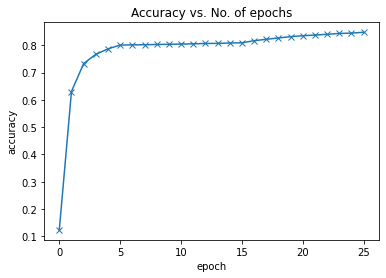

In [226]:
history = [result0] + history1 + history2 + history3 + history4 + history5
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs'); 

## **Testing with individual images**

In [227]:
test_dataset = MNIST(root='data/',
                train = False, 
                transform =transforms.ToTensor() )

torch.Size([1, 28, 28]) 7


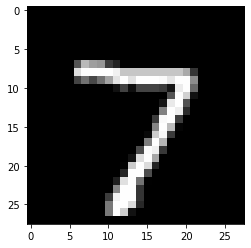

In [228]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print(img.shape, label)

In [229]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [230]:
def predict_img(img, model):
  xb = img.unsqueeze(0)  # add extra dimention
  yb = model(xb)
  _,preds = torch.max(yb, dim=1)
  return preds[0].item()

Label: 7 Predicted: 7


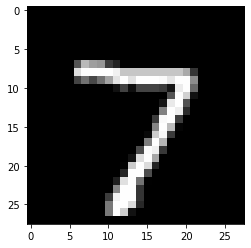

In [231]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Predicted:', predict_img(img, model))

Label: 0 Predicted: 0


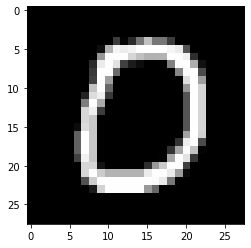

In [232]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Predicted:', predict_img(img, model))

Label: 9 Predicted: 9


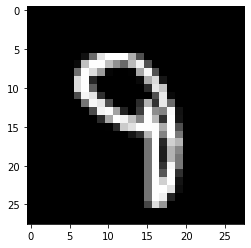

In [233]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Predicted:', predict_img(img, model))

Label: 4 Predicted: 4


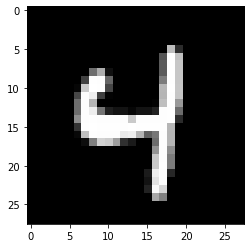

In [234]:
img, label = test_dataset[1230]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Predicted:', predict_img(img, model))

Label: 6 Predicted: 6


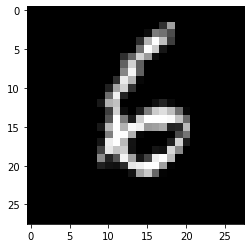

In [235]:
img, label = test_dataset[2000]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Predicted:', predict_img(img, model))

Label: 2 Predicted: 8


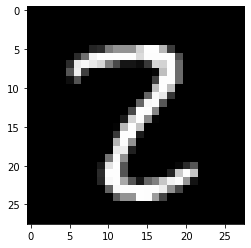

In [236]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Predicted:', predict_img(img, model))

In [237]:
# accuracy and loss on test set
test_loader = DataLoader(test_dataset, batch_size = 256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.7021190524101257, 'val_acc': 0.8529297113418579}

### **Saving and loading model**

In [238]:
torch.save(model.state_dict(), 'mnist_model.pth')

The .state_dict method returns an OrderedDict containing all the weights and bias matrices mapped to the right attributes of the model.

In [239]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0037, -0.0288,  0.0191,  ...,  0.0187,  0.0303,  0.0274],
                      [-0.0090,  0.0073,  0.0158,  ...,  0.0226,  0.0219,  0.0173],
                      [-0.0075, -0.0061, -0.0330,  ...,  0.0199,  0.0123, -0.0336],
                      ...,
                      [ 0.0076, -0.0093,  0.0307,  ...,  0.0342, -0.0106,  0.0060],
                      [ 0.0230,  0.0097, -0.0294,  ..., -0.0019,  0.0201, -0.0341],
                      [-0.0129,  0.0227,  0.0147,  ..., -0.0114,  0.0058,  0.0300]])),
             ('linear.bias',
              tensor([-0.0253,  0.0688, -0.0201, -0.0026,  0.0312,  0.0445, -0.0247,  0.0298,
                      -0.0875, -0.0156]))])

In [240]:
model2 = MnistModel() # instantiate model
model2.load_state_dict(torch.load('mnist_model.pth'))

<All keys matched successfully>

In [241]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0037, -0.0288,  0.0191,  ...,  0.0187,  0.0303,  0.0274],
                      [-0.0090,  0.0073,  0.0158,  ...,  0.0226,  0.0219,  0.0173],
                      [-0.0075, -0.0061, -0.0330,  ...,  0.0199,  0.0123, -0.0336],
                      ...,
                      [ 0.0076, -0.0093,  0.0307,  ...,  0.0342, -0.0106,  0.0060],
                      [ 0.0230,  0.0097, -0.0294,  ..., -0.0019,  0.0201, -0.0341],
                      [-0.0129,  0.0227,  0.0147,  ..., -0.0114,  0.0058,  0.0300]])),
             ('linear.bias',
              tensor([-0.0253,  0.0688, -0.0201, -0.0026,  0.0312,  0.0445, -0.0247,  0.0298,
                      -0.0875, -0.0156]))])

In [242]:
# check model2
test_loader = DataLoader(test_dataset,batch_size = 128)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.7039906978607178, 'val_acc': 0.8542326092720032}

We've created a fairly sophisticated training and evaluation pipeline in this tutorial. Here's a list of the topics we've covered:



*   Working with images in PyTorch (using the MNIST dataset)
*  Splitting a dataset into training, validation and test sets
*  Creating PyTorch models with custom logic by extending the nn.Module class
* Interpreting model ouputs as probabilities using softmax, and picking predicted labels
* Picking a good evaluation metric (accuracy) and loss function (cross entropy) for classification problems
* Setting up a training loop that also evaluates the model using the validation set
* Testing the model manually on randomly picked examples
* Saving and loading model checkpoints to avoid retraining from scratch

